In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import nltk
import re
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from urllib.request import urlopen

nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
cloud = ""

In [5]:
def preprocess(w):
    global cloud
    w = w.lower()
    w= re.sub(r'<br />', '',w)
    w= re.sub(r'[{}\][?()*&^%$#@!.<>;/,|\\"\']', ' ',w)
    word_tokens =w.split()
    filtered_text = [word for word in word_tokens if word not in stopwords]
    stems = [lemmatizer.lemmatize(word) for word in filtered_text]
    cloud += " ".join(stems)+" "
    return " ".join(stems)

In [6]:
df["review"] = df["review"].apply(preprocess)

In [7]:
df.head()

,review,sentiment
0,one reviewer mentioned watching 1 oz episode h...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(cloud)
 


In [9]:
X = df['review'].values
y = df['sentiment'].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)
y = to_categorical(y)

[1 1 1 ... 0 0 0]


Text(0.5, 1.0, 'Count Plot')

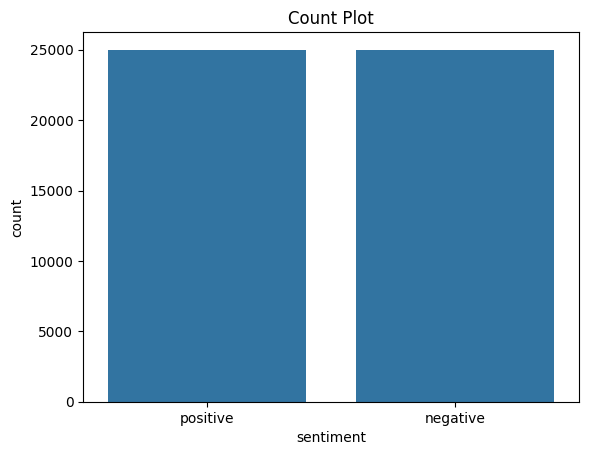

In [10]:
import seaborn as sns
sns.countplot(df,x='sentiment')
plt.title("Count Plot")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
max_len = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [16]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [46]:
embedding_dim = 100
num_classes = 2
embedding_index = {}
glove_path = os.path.join('glove', 'glove.6B.100d.txt')
with open(glove_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [77]:
len(tokenizer.word_index)

88423

In [62]:
vocab_size =88423
embedding_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [65]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(SimpleRNN(128))  
model.add(Dense(num_classes, activation='sigmoid'))

In [66]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
500/500 [==============================] - 48s 58ms/step - loss: 0.6129 - accuracy: 0.6689 - val_loss: 0.6112 - val_accuracy: 0.6890
Epoch 2/10
500/500 [==============================] - 27s 54ms/step - loss: 0.6272 - accuracy: 0.6437 - val_loss: 0.6613 - val_accuracy: 0.6009
Epoch 3/10
500/500 [==============================] - 29s 58ms/step - loss: 0.6419 - accuracy: 0.5997 - val_loss: 0.6100 - val_accuracy: 0.6205
Epoch 4/10
500/500 [==============================] - 29s 58ms/step - loss: 0.6602 - accuracy: 0.5985 - val_loss: 0.6617 - val_accuracy: 0.6033
Epoch 5/10
500/500 [==============================] - 30s 60ms/step - loss: 0.6628 - accuracy: 0.5911 - val_loss: 0.6618 - val_accuracy: 0.6021
Epoch 6/10
500/500 [==============================] - 31s 63ms/step - loss: 0.6521 - accuracy: 0.6058 - val_loss: 0.6699 - val_accuracy: 0.5821
Epoch 7/10
500/500 [==============================] - 29s 59ms/step - loss: 0.6480 - accuracy: 0.6062 - val_loss: 0.6411 - val_accuracy:

In [67]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

313/313 [==============================] - 4s 11ms/step - loss: 0.6846 - accuracy: 0.5113
Test Accuracy: 51.13%


In [71]:
test = input("Enter the text to predict : ")

In [72]:
test

"What an empty and lack lustre rendition of the classic novel. I do wish people would stop messing about with classics when they clearly have no idea of the real intention or point of the original. This version is no different. I felt that the Ralph Fiennes version is much worse though as the casting of Juliette brioche as Kathy has got to be the worst casting decision EVER...anyway back to this version. It aims to make the story relevant to a contemporary setting and in a musical style. It succeeds in both but high art it is nit. Throwaway viewing for a rainy day maybe...The direction was average and the editing abysmal. Worse than the old Quincy. Deepak Verma does a great turn as Hindley and is in fact one of Britains wasted talents. The part of Heath was played with great charm and belief and I think that the casting is the strongest point of this project. Although a more talented director would have made better use of the facilities he had. Its clear that he was a director for hire

In [73]:
w =preprocess(test)

In [76]:
w

'empty lack lustre rendition classic novel wish people would stop messing classic clearly idea real intention point original version different felt ralph fiennes version much worse though casting juliette brioche kathy got worst casting decision ever anyway back version aim make story relevant contemporary setting musical style succeeds high art nit throwaway viewing rainy day maybe direction average editing abysmal worse old quincy deepak verma great turn hindley fact one britain wasted talent part heath played great charm belief think casting strongest point project although talented director would made better use facility clear director hire instill project passion deserved'

In [74]:
w_tokens = tokenizer.texts_to_sequences([w])
w_pad = pad_sequences(w_tokens, maxlen=max_len, padding='post')

In [75]:
prediction = model.predict(w_pad)
sentiment_label = label_encoder.inverse_transform([np.argmax(prediction)])
print("Predicted Sentiment:", sentiment_label[0])

1/1 [==============================] - 1s 782ms/step
Predicted Sentiment: negative
